In [2]:
import pandas as pd
import numpy as np

c:\users\ifcreate-06\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\ifcreate-06\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
c:\users\ifcreate-06\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
  stacklevel=1)


### 第一期 Pandas 基础

**1.将下面的字典创建为DataFrame**

In [11]:
data = {"grammer":["Python","C","Java","GO",np.nan,"SQL","PHP","Python"],
       "score":[1,2,np.nan,4,5,6,7,10]}

df = pd.DataFrame(data)
df

,grammer,score
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


**2.提取含有字符串"Python"的行**

In [4]:
results = df[df['grammer'] == 'Python']

#方法二
results = df['grammer'].str.contains("Python")
print(results)
results.fillna(False,inplace = True)
df[results]

0     True
1    False
2    False
3    False
4      NaN
5    False
6    False
7     True
Name: grammer, dtype: object


,grammer,score
0,Python,1.0
7,Python,10.0


**3.输出df的所有列名**

In [5]:
df.columns

Index(['grammer', 'score'], dtype='object')

**4.修改第二列列名为'popularity'**

In [10]:
df.rename(columns={'score':'popularity'}, inplace=True)
df

#方法二：
df.columns = ['grammer', 'popularity']

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


**5.统计grammer列中每种编程语言出现的次数**

In [19]:
df['grammer'].value_counts()


Python    2
C         1
SQL       1
PHP       1
Java      1
GO        1
Name: grammer, dtype: int64

**6.将空值用上下值的平均值填充**

In [27]:
df['popularity'] = df['popularity'].fillna(df['popularity'].interpolate())
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,3.0
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


**7.提取popularity列中值大于3的行**

In [28]:
df[df['popularity']>3]

,grammer,popularity
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


**8.按照grammer列进行去除重复值**

In [29]:
df.drop_duplicates(['grammer'])

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,3.0
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0


**9.计算popularity列平均值**

In [30]:
df['popularity'].mean()

4.75

**10.将grammer列转换为list**

In [32]:
df['grammer'].to_list()

['Python', 'C', 'Java', 'GO', nan, 'SQL', 'PHP', 'Python']

**11.将DataFrame保存为EXCEL**

In [38]:
df.to_excel('test.xlsx')

**12.查看数据行列数**

In [39]:
df.shape

(8, 2)

**13.提取popularity列值大于3小于7的行**

In [42]:
df[(df['popularity']>3) & (df['popularity']<7)]

,grammer,popularity
3,GO,4.0
4,NaN,5.0
5,SQL,6.0


**14.交换两列位置**

In [54]:
temp = df['popularity']
df.drop(labels = ['popularity'],axis=1,inplace=True)
df.insert(0,'popularity', temp)
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,7.0,PHP
7,10.0,Python


**15.提取popularity列最大值所在行**

In [58]:
df[df['popularity']==df['popularity'].max()]

,popularity,grammer
7,10.0,Python


**16.查看最后5行数据**

In [59]:
df.tail(5)

,popularity,grammer
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,7.0,PHP
7,10.0,Python


**17.删除最后一行数据**

In [62]:
df.drop([len(df)-1],inplace=True)
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL


**18.添加一行数据['Perl',6.6]**

In [15]:
new_row = {"popularity":6.6,"grammer":'Perl'}
df.append(new_row, ignore_index=True)
df

,grammer,score
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


**19.对数据按照"popularity"列值的大小进行排序**

In [73]:
df.sort_values('popularity',inplace=True)
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL


**20.统计grammer列每个字符串的长度**

In [76]:
df['grammer'] = df['grammer'].fillna('R')
df['len_str '] = df['grammer'].map(lambda x:len(x))
df

,popularity,grammer,len_str
0,1.0,Python,6
1,2.0,C,1
2,3.0,Java,4
3,4.0,GO,2
4,5.0,R,1
5,6.0,SQL,3


### 第二期 Pandas数据处理

**21.读取本地EXCEL数据**

In [38]:
df = pd.read_excel('../demo/data/pandas120.xlsx',engine='openpyxl')
df

,Unnamed: 0,createTime,education,salary
0,0,2020-03-16 11:30:18,本科,20k-35k
1,1,2020-03-16 10:58:48,本科,20k-40k
2,2,2020-03-16 10:46:39,不限,20k-35k
3,3,2020-03-16 10:45:44,本科,13k-20k
4,4,2020-03-16 10:20:41,本科,10k-20k
...,...,...,...,...
130,130,2020-03-16 11:36:07,本科,10k-18k
131,131,2020-03-16 09:54:47,硕士,25k-50k
132,132,2020-03-16 10:48:32,本科,20k-40k
133,133,2020-03-16 10:46:31,本科,15k-23k


**22.查看df数据前5行**

In [19]:
df.head(5)

,Unnamed: 0,createTime,education,salary
0,0,2020-03-16 11:30:18,本科,20k-35k
1,1,2020-03-16 10:58:48,本科,20k-40k
2,2,2020-03-16 10:46:39,不限,20k-35k
3,3,2020-03-16 10:45:44,本科,13k-20k
4,4,2020-03-16 10:20:41,本科,10k-20k


**23.将salary列数据转换为最大值与最小值的平均值**

In [37]:
import re

def get_mean(string):
    sala_min = 0
    sala_max = 0
    num_list = re.findall(r'(\d+)',string)
    if len(num_list) == 2:
        sala_min = int(num_list[0])
        sala_max = int(num_list[1])
    sala_mean = (sala_min + sala_max)/2
    #print(num_list,sala_min,sala_max)
    return str(sala_mean)
    
df['salary'] = df['salary'].apply(get_mean)
df

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


,Unnamed: 0,createTime,education,salary
0,0,2020-03-16 11:30:18,本科,0
1,1,2020-03-16 10:58:48,本科,0
2,2,2020-03-16 10:46:39,不限,0
3,3,2020-03-16 10:45:44,本科,0
4,4,2020-03-16 10:20:41,本科,0
...,...,...,...,...
130,130,2020-03-16 11:36:07,本科,0
131,131,2020-03-16 09:54:47,硕士,0
132,132,2020-03-16 10:48:32,本科,0
133,133,2020-03-16 10:46:31,本科,0


In [3]:
# 方法二：iterrows + 正则
import re
for index,row in df.iterrows():
    nums = re.findall('\d+',row[3])
    df.iloc[index,3] = int(eval(f'({nums[0]} + {nums[1]}) / 2 * 1000'))
print(df)

     Unnamed: 0          createTime education salary
0             0 2020-03-16 11:30:18        本科  27500
1             1 2020-03-16 10:58:48        本科  30000
2             2 2020-03-16 10:46:39        不限  27500
3             3 2020-03-16 10:45:44        本科  16500
4             4 2020-03-16 10:20:41        本科  15000
..          ...                 ...       ...    ...
130         130 2020-03-16 11:36:07        本科  14000
131         131 2020-03-16 09:54:47        硕士  37500
132         132 2020-03-16 10:48:32        本科  30000
133         133 2020-03-16 10:46:31        本科  19000
134         134 2020-03-16 11:19:38        本科  30000

[135 rows x 4 columns]


**24.将数据根据学历进行分组并计算平均薪资**

In [25]:
df.groupby(['education'])['salary'].mean()

education
不限    19600.000000
大专    10000.000000
本科    19361.344538
硕士    20642.857143
Name: salary, dtype: float64

**25.将createTime列时间转换为月-日**

In [4]:
df['createTime'] = df['createTime'].apply(lambda row:row.to_pydatetime().strftime('%Y/%m/%d'))
df

,Unnamed: 0,createTime,education,salary
0,0,2020/03/16,本科,27500
1,1,2020/03/16,本科,30000
2,2,2020/03/16,不限,27500
3,3,2020/03/16,本科,16500
4,4,2020/03/16,本科,15000
...,...,...,...,...
130,130,2020/03/16,本科,14000
131,131,2020/03/16,硕士,37500
132,132,2020/03/16,本科,30000
133,133,2020/03/16,本科,19000


**26.查看索引、数据类型和内存信息**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  135 non-null    int64 
 1   createTime  135 non-null    object
 2   education   135 non-null    object
 3   salary      135 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.3+ KB


**27.查看数值型列的汇总统计**

In [11]:
df.describe()

,Unnamed: 0
count,135.000000
mean,67.000000
std,39.115214
min,0.000000
25%,33.500000
50%,67.000000
75%,100.500000
max,134.000000


**28.新增一列根据salary将数据分为三组**

numpy类似题目回顾： 

/<code>
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    iris = np.genfromtxt(url, delimiter=',', dtype='object')

    # Bin petallength 
    petal_length_bin = np.digitize(iris[:, 2].astype('float'), [0, 3, 5, 10])

    # Map it to respective category
    label_map = {1: 'small', 2: 'medium', 3: 'large', 4: np.nan}
    petal_length_cat = [label_map[x] for x in petal_length_bin]

    # View
    petal_length_cat[:10]
/</code>

In [13]:
bins = [0,5000,20000,50000]
group_names = ['低' ,'中', '高']
df['categories'] = pd.cut(df['salary'], bins, labels = group_names)

In [14]:
df

,Unnamed: 0,createTime,education,salary,categories
0,0,2020/03/16,本科,27500,高
1,1,2020/03/16,本科,30000,高
2,2,2020/03/16,不限,27500,高
3,3,2020/03/16,本科,16500,中
4,4,2020/03/16,本科,15000,中
...,...,...,...,...,...
130,130,2020/03/16,本科,14000,中
131,131,2020/03/16,硕士,37500,高
132,132,2020/03/16,本科,30000,高
133,133,2020/03/16,本科,19000,中


**29.按照salary列对数据降序排列**

In [18]:
df.sort_values(['salary'], ascending=False)

,Unnamed: 0,createTime,education,salary,categories
53,53,2020/03/16,本科,45000,高
37,37,2020/03/16,本科,40000,高
101,101,2020/03/16,本科,37500,高
16,16,2020/03/16,本科,37500,高
131,131,2020/03/16,硕士,37500,高
...,...,...,...,...,...
123,123,2020/03/16,本科,4500,低
126,126,2020/03/16,本科,4000,低
110,110,2020/03/16,本科,4000,低
96,96,2020/03/16,不限,3500,低


**30.取出第33行数据**

In [20]:
df.iloc[32]

Unnamed: 0            32
createTime    2020/03/16
education             硕士
salary             22500
categories             高
Name: 32, dtype: object

**31.计算salary列的中位数**

In [22]:
df['salary'].median()#np.median(df['salary'])

17500.0

**32.绘制薪资水平频率分布直方图**

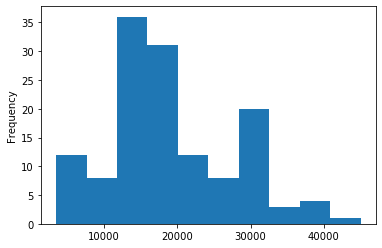

In [27]:
df.salary.plot.hist()#df.salary.plot(kind='hist')

**33.绘制薪资水平密度曲线**

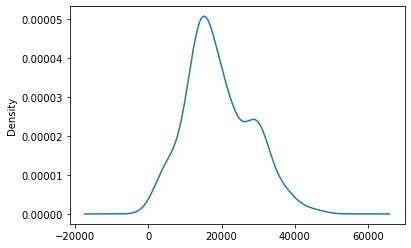

In [28]:
df.salary.plot.kde()#df.salary.plot(kind='kde',xlim=(0,80000))

**34.删除最后一列categories**

In [29]:
df.drop(labels = ['categories'], axis=1)#df.drop(columns=['categories'], inplace=True)

,Unnamed: 0,createTime,education,salary
0,0,2020/03/16,本科,27500
1,1,2020/03/16,本科,30000
2,2,2020/03/16,不限,27500
3,3,2020/03/16,本科,16500
4,4,2020/03/16,本科,15000
...,...,...,...,...
130,130,2020/03/16,本科,14000
131,131,2020/03/16,硕士,37500
132,132,2020/03/16,本科,30000
133,133,2020/03/16,本科,19000


**35.将df的第一列与第二列合并为新的一列**

In [30]:
df['test'] = df['createTime']+df['education']

In [31]:
df.head(5)

,Unnamed: 0,createTime,education,salary,categories,test
0,0,2020/03/16,本科,27500,高,2020/03/16本科
1,1,2020/03/16,本科,30000,高,2020/03/16本科
2,2,2020/03/16,不限,27500,高,2020/03/16不限
3,3,2020/03/16,本科,16500,中,2020/03/16本科
4,4,2020/03/16,本科,15000,中,2020/03/16本科


**36.将education列与salary列合并为新的一列** 

#备注：salary为int类型，操作与35题有所不同

In [39]:
df['test2'] = df['salary'].apply(str)+df['education']
df

,Unnamed: 0,createTime,education,salary,test2
0,0,2020-03-16 11:30:18,本科,20k-35k,20k-35k本科
1,1,2020-03-16 10:58:48,本科,20k-40k,20k-40k本科
2,2,2020-03-16 10:46:39,不限,20k-35k,20k-35k不限
3,3,2020-03-16 10:45:44,本科,13k-20k,13k-20k本科
4,4,2020-03-16 10:20:41,本科,10k-20k,10k-20k本科
...,...,...,...,...,...
130,130,2020-03-16 11:36:07,本科,10k-18k,10k-18k本科
131,131,2020-03-16 09:54:47,硕士,25k-50k,25k-50k硕士
132,132,2020-03-16 10:48:32,本科,20k-40k,20k-40k本科
133,133,2020-03-16 10:46:31,本科,15k-23k,15k-23k本科


**37.计算salary最大值与最小值之差**

In [38]:
df['salary'].max()-df['salary'].min()#df[['salary']].apply(lambda x: x.max() - x.min())

41500

**38.将第一行与最后一行拼接**

In [44]:
pd.concat([df[:1],df[-2:-1]])

,Unnamed: 0,createTime,education,salary,categories,test,test2
0,0,2020/03/16,本科,27500,高,2020/03/16本科,27500本科
133,133,2020/03/16,本科,19000,中,2020/03/16本科,19000本科


**39.将第8行数据添加至末尾**

In [47]:
df.append(df.iloc[7])

,Unnamed: 0,createTime,education,salary,categories,test,test2
0,0,2020/03/16,本科,27500,高,2020/03/16本科,27500本科
1,1,2020/03/16,本科,30000,高,2020/03/16本科,30000本科
2,2,2020/03/16,不限,27500,高,2020/03/16不限,27500不限
3,3,2020/03/16,本科,16500,中,2020/03/16本科,16500本科
4,4,2020/03/16,本科,15000,中,2020/03/16本科,15000本科
...,...,...,...,...,...,...,...
131,131,2020/03/16,硕士,37500,高,2020/03/16硕士,37500硕士
132,132,2020/03/16,本科,30000,高,2020/03/16本科,30000本科
133,133,2020/03/16,本科,19000,中,2020/03/16本科,19000本科
134,134,2020/03/16,本科,30000,高,2020/03/16本科,30000本科


**40.查看每列的数据类型**

In [48]:
df.dtypes

Unnamed: 0       int64
createTime      object
education       object
salary          object
categories    category
test            object
test2           object
dtype: object

**41.将createTime列设置为索引**

In [52]:
df.set_index('createTime')

,Unnamed: 0,education,salary,categories,test,test2
createTime,,,,,,
2020/03/16,0,本科,27500,高,2020/03/16本科,27500本科
2020/03/16,1,本科,30000,高,2020/03/16本科,30000本科
2020/03/16,2,不限,27500,高,2020/03/16不限,27500不限
2020/03/16,3,本科,16500,中,2020/03/16本科,16500本科
2020/03/16,4,本科,15000,中,2020/03/16本科,15000本科
...,...,...,...,...,...,...
2020/03/16,130,本科,14000,中,2020/03/16本科,14000本科
2020/03/16,131,硕士,37500,高,2020/03/16硕士,37500硕士
2020/03/16,132,本科,30000,高,2020/03/16本科,30000本科


In [57]:
df.drop(labels='Unnamed: 0',axis=1)

,createTime,education,salary,categories,test,test2
0,2020/03/16,本科,27500,高,2020/03/16本科,27500本科
1,2020/03/16,本科,30000,高,2020/03/16本科,30000本科
2,2020/03/16,不限,27500,高,2020/03/16不限,27500不限
3,2020/03/16,本科,16500,中,2020/03/16本科,16500本科
4,2020/03/16,本科,15000,中,2020/03/16本科,15000本科
...,...,...,...,...,...,...
130,2020/03/16,本科,14000,中,2020/03/16本科,14000本科
131,2020/03/16,硕士,37500,高,2020/03/16硕士,37500硕士
132,2020/03/16,本科,30000,高,2020/03/16本科,30000本科
133,2020/03/16,本科,19000,中,2020/03/16本科,19000本科


**42.生成一个和df长度相同的随机数dataframe**

In [67]:
df1 = pd.DataFrame(pd.Series(np.random.randint(0,10,df.shape[0])),columns=['random'])
df1

,random
0,2
1,4
2,8
3,8
4,9
...,...
130,9
131,8
132,0
133,9


**43.将上一题生成的dataframe与df合并**

In [73]:
df = pd.concat([df,df1],axis=1)
df

,Unnamed: 0,createTime,education,salary,categories,test,test2,0,random
1,1,2020/03/16,本科,30000,高,2020/03/16本科,30000本科,9,4
2,2,2020/03/16,不限,27500,高,2020/03/16不限,27500不限,4,8
3,3,2020/03/16,本科,16500,中,2020/03/16本科,16500本科,3,8
4,4,2020/03/16,本科,15000,中,2020/03/16本科,15000本科,1,9
5,5,2020/03/16,本科,14000,中,2020/03/16本科,14000本科,4,9
...,...,...,...,...,...,...,...,...,...
130,130,2020/03/16,本科,14000,中,2020/03/16本科,14000本科,3,9
131,131,2020/03/16,硕士,37500,高,2020/03/16硕士,37500硕士,2,8
132,132,2020/03/16,本科,30000,高,2020/03/16本科,30000本科,8,0
133,133,2020/03/16,本科,19000,中,2020/03/16本科,19000本科,0,9


**44.生成新的一列new为salary列减去之前生成随机数列**

In [74]:
df['new'] = df['salary'] - df['random']

In [75]:
df

,Unnamed: 0,createTime,education,salary,categories,test,test2,0,random,new
1,1,2020/03/16,本科,30000,高,2020/03/16本科,30000本科,9,4,29996
2,2,2020/03/16,不限,27500,高,2020/03/16不限,27500不限,4,8,27492
3,3,2020/03/16,本科,16500,中,2020/03/16本科,16500本科,3,8,16492
4,4,2020/03/16,本科,15000,中,2020/03/16本科,15000本科,1,9,14991
5,5,2020/03/16,本科,14000,中,2020/03/16本科,14000本科,4,9,13991
...,...,...,...,...,...,...,...,...,...,...
130,130,2020/03/16,本科,14000,中,2020/03/16本科,14000本科,3,9,13991
131,131,2020/03/16,硕士,37500,高,2020/03/16硕士,37500硕士,2,8,37492
132,132,2020/03/16,本科,30000,高,2020/03/16本科,30000本科,8,0,30000
133,133,2020/03/16,本科,19000,中,2020/03/16本科,19000本科,0,9,18991


**45.检查数据中是否含有任何缺失值**

In [118]:
df.isnull().values.any()

False

**46.将salary列类型转换为浮点数**

In [82]:
import numpy as np
df['salary'].astype(np.float64)

1      30000.0
2      27500.0
3      16500.0
4      15000.0
5      14000.0
        ...   
130    14000.0
131    37500.0
132    30000.0
133    19000.0
134    30000.0
Name: salary, Length: 134, dtype: float64

**47.计算salary大于10000的次数**

In [85]:
len(df[df['salary']>10000])

118

**48.查看每种学历出现的次数**

In [88]:
df.education.value_counts()

本科    118
硕士      7
不限      5
大专      4
Name: education, dtype: int64

**49.查看education列共有几种学历**

In [92]:
df.education.nunique()

4

**50.提取salary与new列的和大于60000的最后3行**

In [94]:
df[df['salary']+df['new']>60000].tail(3)

#方法2：
df1 = df[['salary','new']]
rowsums = df1.apply(np.sum, axis=1)
res = df.iloc[np.where(rowsums > 60000)[0][-3:], :]
res

,Unnamed: 0,createTime,education,salary,categories,test,test2,0,random,new
92,92,2020/03/16,本科,35000,高,2020/03/16本科,35000本科,0,8,34992
101,101,2020/03/16,本科,37500,高,2020/03/16本科,37500本科,7,5,37495
131,131,2020/03/16,硕士,37500,高,2020/03/16硕士,37500硕士,2,8,37492


# 第三期 金融数据处理

**51.使用绝对路径读取本地Excel数据**

In [3]:
data = pd.read_excel('data/600000.SH.xlsx',engine='openpyxl')


**52.查看数据前三行**

In [111]:
data.head(3)

,Unnamed: 0,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
0,0,600000.SH,浦发银行,2016-01-04,16.1356,16.1444,16.1444,15.4997,15.7205,42240610,754425783,-0.4151,-2.5725,17.8602,0.2264,3.320318e+11,3.320318e+11,1.865347e+10,6.5614
1,1,600000.SH,浦发银行,2016-01-05,15.7205,15.4644,15.9501,15.3672,15.8618,58054793,1034181474,0.1413,0.8989,17.8139,0.3112,3.350163e+11,3.350163e+11,1.865347e+10,6.6204
2,2,600000.SH,浦发银行,2016-01-06,15.8618,15.8088,16.0208,15.6234,15.9855,46772653,838667398,0.1236,0.7795,17.9307,0.2507,3.376278e+11,3.376278e+11,1.865347e+10,6.6720


**53.查看每列数据缺失值情况**

In [116]:
data.isnull().sum()

Unnamed: 0    0
代码            1
简称            2
日期            2
前收盘价(元)       2
开盘价(元)        2
最高价(元)        2
最低价(元)        2
收盘价(元)        2
成交量(股)        2
成交金额(元)       2
涨跌(元)         2
涨跌幅(%)        2
均价(元)         2
换手率(%)        2
A股流通市值(元)     2
总市值(元)        2
A股流通股本(股)     2
市盈率           2
dtype: int64

**54.提取日期列含有空值的行**

In [120]:
data[data['日期'].isnull()]

,Unnamed: 0,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
327,327,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,328,数据来源：Wind资讯,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**55.输出每列缺失值具体行数**

In [130]:
for column in data.columns:
    if data[column].count() != len(data):
        loc = data[data[column].isnull()].index.to_list()#data[column][data[column].isnull().values==True].index.tolist()
        print(f"列名：{column}，第{loc}行有缺失值")

列名：代码，第[327]行有缺失值
列名：简称，第[327, 328]行有缺失值
列名：日期，第[327, 328]行有缺失值
列名：前收盘价(元)，第[327, 328]行有缺失值
列名：开盘价(元)，第[327, 328]行有缺失值
列名：最高价(元)，第[327, 328]行有缺失值
列名：最低价(元)，第[327, 328]行有缺失值
列名：收盘价(元)，第[327, 328]行有缺失值
列名：成交量(股)，第[327, 328]行有缺失值
列名：成交金额(元)，第[327, 328]行有缺失值
列名：涨跌(元)，第[327, 328]行有缺失值
列名：涨跌幅(%)，第[327, 328]行有缺失值
列名：均价(元)，第[327, 328]行有缺失值
列名：换手率(%)，第[327, 328]行有缺失值
列名：A股流通市值(元)，第[327, 328]行有缺失值
列名：总市值(元)，第[327, 328]行有缺失值
列名：A股流通股本(股)，第[327, 328]行有缺失值
列名：市盈率，第[327, 328]行有缺失值


**56.删除所有存在缺失值的行**

In [4]:
'''
备注
axis：0-行操作（默认），1-列操作
how：any-只要有空值就删除（默认），all-全部为空值才删除
inplace：False-返回新的数据集（默认），True-在原数据集上操作
'''
data.dropna(axis=0, how='any', inplace=True)

**57.绘制收盘价的折线图**

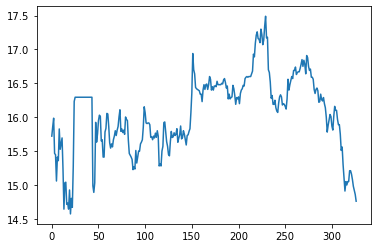

In [133]:
data['收盘价(元)'].plot()

/<code>
import matplotlib.pyplot as plt 
plt.style.use('seaborn-darkgrid') # 设置画图的风格
plt.rc('font',  size=6) #设置图中字体和大小
plt.rc('figure', figsize=(4,3), dpi=150) # 设置图的大小
data['收盘价(元)'].plot()

等价于
import matplotlib.pyplot as plt
plt.plot(df['收盘价(元)'])
/</code>

**58.同时绘制开盘价与收盘价**

c:\users\ifcreate-06\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ifcreate-06\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30424 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ifcreate-06\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ifcreate-06\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20803 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ifcreate-06\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24320 missing from c

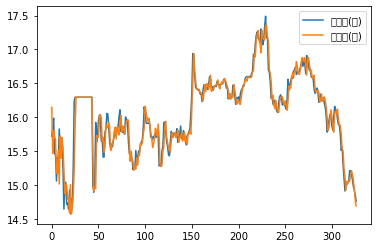

In [137]:
data[['收盘价(元)','开盘价(元)']].plot()

**59.绘制涨跌幅的直方图**

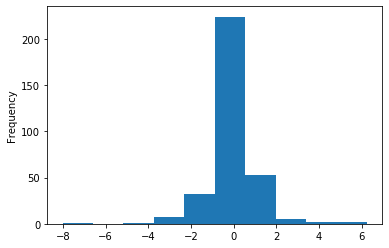

In [140]:
data['涨跌幅(%)'].plot(kind='hist')

#等价于
from matplotlib import pyplot as plt
#plt.hist(df['涨跌幅(%)'])
# 等价于
#df['涨跌幅(%)'].hist()

**60.让直方图更细致**

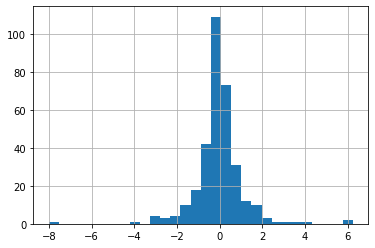

In [141]:
data['涨跌幅(%)'].hist(bins=30)

**61.以data的列名创建一个dataframe**

In [144]:
temp = pd.DataFrame(columns=data.columns)
temp

,Unnamed: 0,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率


**62.打印所有换手率不是数字的行**

In [164]:
import re
def is_num(row):
    is_num = False
    res = re.findall(r'(\d+)', str(row))
    if len(res)!=0:
        is_num = True
    return is_num
temp = data[data['换手率(%)'].apply(is_num).values==False]
temp

#方法2：
#for i in range(len(data)):
    #if type(data.iloc[i,13]) != float:
        #temp = temp.append(data.loc[i])

#temp

,Unnamed: 0,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
26,26,600000.SH,浦发银行,2016-02-16,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
27,27,600000.SH,浦发银行,2016-02-17,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
28,28,600000.SH,浦发银行,2016-02-18,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
29,29,600000.SH,浦发银行,2016-02-19,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
30,30,600000.SH,浦发银行,2016-02-22,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
31,31,600000.SH,浦发银行,2016-02-23,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
32,32,600000.SH,浦发银行,2016-02-24,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
33,33,600000.SH,浦发银行,2016-02-25,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
34,34,600000.SH,浦发银行,2016-02-26,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
35,35,600000.SH,浦发银行,2016-02-29,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801


**63.打印所有换手率为--的行**

In [167]:
def is_in(row):
    flag = False
    res = re.findall(r'(--)', str(row))
    if len(res)!=0:
        flag = True
    return flag
temp = data[data['换手率(%)'].apply(is_in)]
temp
#等价于
#data[data['换手率(%)'].isin(['--'])]

,Unnamed: 0,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
26,26,600000.SH,浦发银行,2016-02-16,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
27,27,600000.SH,浦发银行,2016-02-17,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
28,28,600000.SH,浦发银行,2016-02-18,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
29,29,600000.SH,浦发银行,2016-02-19,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
30,30,600000.SH,浦发银行,2016-02-22,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
31,31,600000.SH,浦发银行,2016-02-23,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
32,32,600000.SH,浦发银行,2016-02-24,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
33,33,600000.SH,浦发银行,2016-02-25,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
34,34,600000.SH,浦发银行,2016-02-26,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
35,35,600000.SH,浦发银行,2016-02-29,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801


**64.重置data的行号**

In [5]:
data = data.reset_index()

**65.删除所有换手率为非数字的行**

In [203]:
def is_num(row):
    is_num = False
    res = re.findall(r'(\d+)', str(row))
    if len(res)!=0:
        is_num = True
    return is_num
locs = data[data['换手率(%)'].apply(is_num).values==False].index.tolist()
data.drop(locs, inplace=True)

#等价于
'''
k =[]
for i in range(len(data)):
    if type(data.iloc[i,13]) != float:
        k.append(i)
data.drop(labels=k,inplace=True)

'''

'\nk =[]\nfor i in range(len(data)):\n    if type(data.iloc[i,13]) != float:\n        k.append(i)\ndata.drop(labels=k,inplace=True)\n\n'

In [174]:
data

,index,Unnamed: 0,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
0,0,0,600000.SH,浦发银行,2016-01-04,16.1356,16.1444,16.1444,15.4997,15.7205,42240610,754425783,-0.4151,-2.5725,17.8602,0.2264,3.320318e+11,3.320318e+11,1.865347e+10,6.5614
1,1,1,600000.SH,浦发银行,2016-01-05,15.7205,15.4644,15.9501,15.3672,15.8618,58054793,1034181474,0.1413,0.8989,17.8139,0.3112,3.350163e+11,3.350163e+11,1.865347e+10,6.6204
2,2,2,600000.SH,浦发银行,2016-01-06,15.8618,15.8088,16.0208,15.6234,15.9855,46772653,838667398,0.1236,0.7795,17.9307,0.2507,3.376278e+11,3.376278e+11,1.865347e+10,6.6720
3,3,3,600000.SH,浦发银行,2016-01-07,15.9855,15.7205,15.8088,15.3672,15.4644,11350479,199502702,-0.5211,-3.2597,17.5766,0.0608,3.266223e+11,3.266223e+11,1.865347e+10,6.4545
4,4,4,600000.SH,浦发银行,2016-01-08,15.4644,15.6675,15.7912,14.9345,15.4467,71918296,1262105060,-0.0177,-0.1142,17.5492,0.3855,3.262492e+11,3.262492e+11,1.865347e+10,6.4471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,322,322,600000.SH,浦发银行,2017-05-03,15.1600,15.1600,15.1600,15.0500,15.0800,14247943,215130847,-0.0800,-0.5277,15.0991,0.0659,3.260037e+11,3.260037e+11,2.161828e+10,6.1395
323,323,323,600000.SH,浦发银行,2017-05-04,15.0800,15.0700,15.0700,14.9000,14.9800,19477788,291839737,-0.1000,-0.6631,14.9832,0.0901,3.238418e+11,3.238418e+11,2.161828e+10,6.0988
324,324,324,600000.SH,浦发银行,2017-05-05,14.9800,14.9500,14.9800,14.5200,14.9200,40194577,592160198,-0.0600,-0.4005,14.7323,0.1859,3.225447e+11,3.225447e+11,2.161828e+10,6.0744
325,325,325,600000.SH,浦发银行,2017-05-08,14.9200,14.7800,14.9000,14.5100,14.8600,43568576,638781010,-0.0600,-0.4021,14.6615,0.2015,3.212476e+11,3.212476e+11,2.161828e+10,6.0500


**66.绘制换手率的密度曲线**

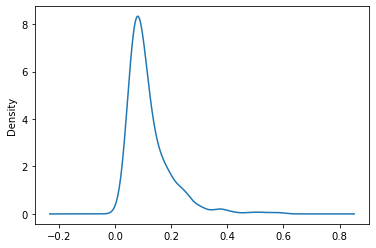

In [175]:
data['换手率(%)'].plot(kind='kde')

**67.计算前一天与后一天收盘价的差值**

In [179]:
data['收盘价(元)']-data['前收盘价(元)']
#等价于
#data['收盘价(元)'].diff()

0     -0.4151
1      0.1413
2      0.1237
3     -0.5211
4     -0.0177
        ...  
322   -0.0800
323   -0.1000
324   -0.0600
325   -0.0600
326   -0.1000
Length: 309, dtype: float64

**68.计算前一天与后一天收盘价变化率**

In [183]:
(data['收盘价(元)']-data['前收盘价(元)'])/data['前收盘价(元)']
#等价于
#data['收盘价(元)'].pct_change()

0     -0.025726
1      0.008988
2      0.007799
3     -0.032598
4     -0.001145
         ...   
322   -0.005277
323   -0.006631
324   -0.004005
325   -0.004021
326   -0.006729
Length: 309, dtype: float64

**69.设置日期为索引**

In [6]:
data = data.set_index('日期')

**70.以5个数据作为一个数据滑动窗口，在这个5个数据上取均值(收盘价)**
#### ***

In [185]:
data['收盘价(元)'].rolling(5).mean()

0           NaN
1           NaN
2           NaN
3           NaN
4      15.69578
         ...   
322    15.14200
323    15.12800
324    15.07000
325    15.00000
326    14.92000
Name: 收盘价(元), Length: 309, dtype: float64

**71.以5个数据作为一个数据滑动窗口，计算这五个数据总和(收盘价)**

In [186]:
data['收盘价(元)'].rolling(5).sum()

0          NaN
1          NaN
2          NaN
3          NaN
4      78.4789
        ...   
322    75.7100
323    75.6400
324    75.3500
325    75.0000
326    74.6000
Name: 收盘价(元), Length: 309, dtype: float64

**72.将收盘价5日均线、20日均线与原始数据绘制在同一个图上**

c:\users\ifcreate-06\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ifcreate-06\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ifcreate-06\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\ifcreate-06\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


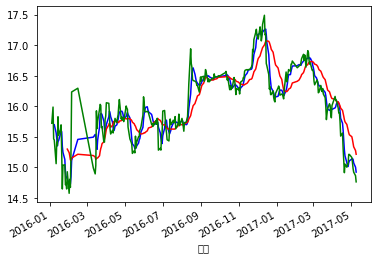

In [215]:
data['收盘价(元)'].rolling(5).mean().plot(color='blue')
data['收盘价(元)'].rolling(20).mean().plot(color='red')
data['收盘价(元)'].plot(color='green')



**73.按周为采样规则，取一周收盘价最大值**

In [205]:
data['收盘价(元)'].resample('W').max()

日期
2016-01-10    15.9855
2016-01-17    15.8265
2016-01-24    15.6940
2016-01-31    15.0405
2016-02-07    16.2328
               ...   
2017-04-16    15.9700
2017-04-23    15.5600
2017-04-30    15.2100
2017-05-07    15.1600
2017-05-14    14.8600
Freq: W-SUN, Name: 收盘价(元), Length: 71, dtype: float64

**74.绘制重采样数据与原始数据**

c:\users\ifcreate-06\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ifcreate-06\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ifcreate-06\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\ifcreate-06\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


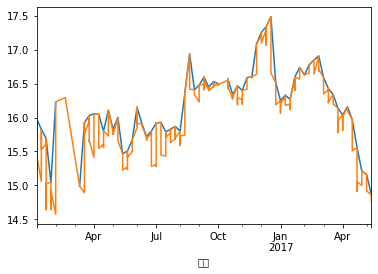

In [217]:
data['收盘价(元)'].resample('W').max().plot()
data['收盘价(元)'].plot()

**75.将数据往后移动5天**

In [218]:
data.shift(5)

,index,Unnamed: 0,代码,简称,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
日期,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-03,317.0,317.0,600000.SH,浦发银行,15.00,15.02,15.10,14.99,15.05,12975919,195296862,0.05,0.3333,15.0507,0.06,3.253551e+11,3.253551e+11,2.161828e+10,6.1273
2017-05-04,318.0,318.0,600000.SH,浦发银行,15.05,15.06,15.11,15.00,15.05,14939871,225022668,0.00,0.0000,15.0619,0.0691,3.253551e+11,3.253551e+11,2.161828e+10,6.1273
2017-05-05,319.0,319.0,600000.SH,浦发银行,15.05,15.05,15.25,15.03,15.21,22887645,345791526,0.16,1.0631,15.1082,0.1059,3.288140e+11,3.288140e+11,2.161828e+10,6.1925


**76.将数据向前移动5天**

In [219]:
data.shift(-5)

,index,Unnamed: 0,代码,简称,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
日期,,,,,,,,,,,,,,,,,,,
2016-01-04,5.0,5.0,600000.SH,浦发银行,15.4467,15.1994,15.4114,14.9786,15.0581,90177135,1550155933,-0.3886,-2.5157,17.1901,0.4834,3.180417e+11,3.180417e+11,1.865347e+10,6.2849
2016-01-05,6.0,6.0,600000.SH,浦发银行,15.0581,15.1641,15.4732,15.0846,15.4114,55374454,964061502,0.3533,2.3460,17.4099,0.2969,3.255031e+11,3.255031e+11,1.865347e+10,6.4324
2016-01-06,7.0,7.0,600000.SH,浦发银行,15.4114,15.5174,15.8088,15.3231,15.3584,47869312,843717365,-0.0530,-0.3438,17.6254,0.2566,3.243839e+11,3.243839e+11,1.865347e+10,6.4102
2016-01-07,8.0,8.0,600000.SH,浦发银行,15.3584,15.0140,15.8883,14.9168,15.8265,54838833,966117848,0.4681,3.0477,17.6174,0.294,3.342702e+11,3.342702e+11,1.865347e+10,6.6056
2016-01-08,9.0,9.0,600000.SH,浦发银行,15.8265,15.7205,16.0296,15.4732,15.5262,46723139,836146426,-0.3003,-1.8973,17.8958,0.2505,3.279280e+11,3.279280e+11,1.865347e+10,6.4803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**77.使用expending函数计算开盘价的移动窗口均值**

#### expending函数是前面数值的累加

In [7]:
print(data['开盘价(元)'])
print(data['开盘价(元)'].expanding(min_periods=1).mean())

日期
2016-01-04    16.1444
2016-01-05    15.4644
2016-01-06    15.8088
2016-01-07    15.7205
2016-01-08    15.6675
               ...   
2017-05-03    15.1600
2017-05-04    15.0700
2017-05-05    14.9500
2017-05-08    14.7800
2017-05-09    14.6900
Name: 开盘价(元), Length: 327, dtype: float64
日期
2016-01-04    16.144400
2016-01-05    15.804400
2016-01-06    15.805867
2016-01-07    15.784525
2016-01-08    15.761120
                ...    
2017-05-03    16.055594
2017-05-04    16.052552
2017-05-05    16.049159
2017-05-08    16.045266
2017-05-09    16.041122
Name: 开盘价(元), Length: 327, dtype: float64


**绘制上一题的移动均值与原始数据折线图**

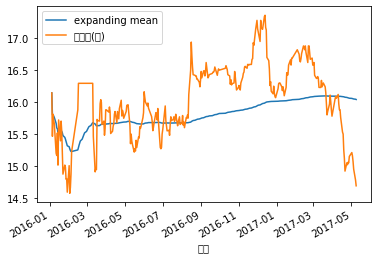

In [9]:
data['expanding mean'] = data['开盘价(元)'].expanding(min_periods=1).mean()
data[['expanding mean','开盘价(元)']].plot()

**79.计算布林指标**

In [10]:
data['former 30 days rolling Close mean']=data['收盘价(元)'].rolling(20).mean()
data['upper bound']=data['former 30 days rolling Close mean']+2*data['收盘价(元)'].rolling(20).std()#在这里我们取20天内的标准差
data['lower bound']=data['former 30 days rolling Close mean']-2*data['收盘价(元)'].rolling(20).std()

80.计算布林线并绘制

c:\users\ifcreate-06\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ifcreate-06\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0, flags=flags)


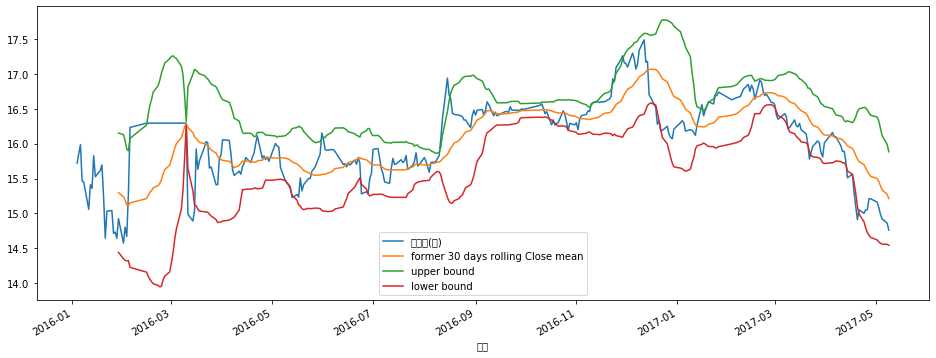

In [11]:
data[['收盘价(元)', 'former 30 days rolling Close mean','upper bound','lower bound' ]].plot(figsize=(16, 6))

### 第四期 当Pandas遇上NumPy

**81.导入并查看pandas与numpy版本**

In [12]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)

1.1.5
1.20.1


**82.从NumPy数组创建DataFrame**

In [28]:
#备注 使用numpy生成20个0-100随机数
arr = np.random.randint(0,100,20)
df1 = pd.DataFrame(arr)
df1

,0
0,14
1,72
2,14
3,82
4,67
5,82
6,2
7,65
8,22
9,99


### 83.从NumPy数组创建DataFrame

In [29]:
#备注 使用numpy生成20个0-100固定步长的数
arr = np.arange(0,100,5)
df2 = pd.DataFrame(arr)
df2.head(5)

,0
0,0
1,5
2,10
3,15
4,20


**84.从NumPy数组创建DataFrame**

In [30]:
#备注 使用numpy生成20个指定分布(如标准正态分布)的数
arr = np.random.normal(0,1,20)
df3 = pd.DataFrame(arr)
df3.head(5)

,0
0,0.515564
1,-0.156169
2,-1.116992
3,-1.859207
4,-0.137920


**85.将df1，df2，df3按照行合并为新DataFrame**

In [34]:
df = pd.concat([df1,df2,df3], axis=0, ignore_index=True)
df.head(3)

,0,1,2
0,14,0,0.515564
1,72,5,-0.156169
2,14,10,-1.116992


**86.将df1，df2，df3按照列合并为新DataFrame**

In [35]:
df = pd.concat([df1,df2,df3], axis=1, ignore_index=True)
df.head(3)

,0,1,2
0,14,0,0.515564
1,72,5,-0.156169
2,14,10,-1.116992


**87.查看df所有数据的最小值、25%分位数、中位数、75%分位数、最大值**

In [38]:
np.percentile(df,q=[0,25,50,75,100])

array([-1.85920712,  0.39665521, 21.        , 65.5       , 99.        ])

**88.修改列名为col1,col2,col3**

In [39]:
df.columns = ['col1', 'col2', 'col3']

**89.提取第一列中不在第二列出现的数字**

In [51]:
not_in1 = df['col1'][~(df['col1']==df['col2'])]
not_in2 = df['col1'][~df['col1'].isin(df['col2'])]
print(df['col1'][0],df['col2'][0])

14 0


**90.提取第一列和第二列出现频率最高的三个数字**

In [53]:
temp = df['col1'].append(df['col2'])
temp.value_counts().index[:3]

Int64Index([75, 65, 51], dtype='int64')

**91.提取第一列中可以整除5的数字位置**

In [63]:
print(np.where(df['col1'] % 5==0))

(array([ 7, 12, 16], dtype=int64),)


**92.计算第一列数字前一个与后一个的差值**

In [66]:
#print(np.diff(df['col1']).tolist())
print(df['col1'].diff().tolist())

[58, -58, 68, -15, 15, -80, 63, -43, 77, -5, -66, 47, -47, -9, -16, 77, -29, 0, 26]
[nan, 58.0, -58.0, 68.0, -15.0, 15.0, -80.0, 63.0, -43.0, 77.0, -5.0, -66.0, 47.0, -47.0, -9.0, -16.0, 77.0, -29.0, 0.0, 26.0]


**93.将col1,col2,clo3三列顺序颠倒**

In [74]:
#df[['col3','col2','col1']]
df.loc[:,::-1]#df.iloc[:,::-1]

,col3,col2,col1
0,0.515564,0,14
1,-0.156169,5,72
2,-1.116992,10,14
3,-1.859207,15,82
4,-0.137920,20,67
5,-0.381750,25,82
6,0.397647,30,2
7,-0.752576,35,65
8,-0.140494,40,22
9,0.393679,45,99


**94.提取第一列位置在1,10,15的数字**

In [77]:
df.iloc[[1,10,15],0]
#等价于
#df['col1'].take([1,10,15])

1     72
10    94
15     3
Name: col1, dtype: int32

**95.查找第一列的局部最大值位置**

In [79]:
#备注 即比它前一个与后一个数字的都大的数字
tem = np.diff(np.sign(np.diff(df['col1'])))
np.where(tem == -2)[0] + 1

array([ 1,  3,  5,  7,  9, 12, 16], dtype=int64)

**96.按行计算df的每一行均值**

In [84]:
print(df.mean(axis=1))
#等价于
print(df[['col1','col2','col3']].mean(axis=1))

0      4.838521
1     25.614610
2      7.627669
3     31.713598
4     28.954027
5     35.539417
6     10.799216
7     33.082475
8     20.619835
9     48.131226
10    48.023049
11    28.515271
12    44.614322
13    30.667052
14    30.118031
15    25.946333
16    53.525154
17    45.991655
18    46.646548
19    56.871735
dtype: float64
0      4.838521
1     25.614610
2      7.627669
3     31.713598
4     28.954027
5     35.539417
6     10.799216
7     33.082475
8     20.619835
9     48.131226
10    48.023049
11    28.515271
12    44.614322
13    30.667052
14    30.118031
15    25.946333
16    53.525154
17    45.991655
18    46.646548
19    56.871735
dtype: float64


**97.对第二列计算移动平均值**

In [86]:
#备注 每次移动三个位置，不可以使用自定义函数

print(df['col2'].rolling(3).mean())
print(np.convolve(df['col2'], np.ones(3)/3, mode='valid'))

0      NaN
1      NaN
2      5.0
3     10.0
4     15.0
5     20.0
6     25.0
7     30.0
8     35.0
9     40.0
10    45.0
11    50.0
12    55.0
13    60.0
14    65.0
15    70.0
16    75.0
17    80.0
18    85.0
19    90.0
Name: col2, dtype: float64
[ 5. 10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80. 85. 90.]


**98.将数据按照第三列值的大小升序排列**

In [90]:
df.sort_values(['col3'], ascending=True)

,col1,col2,col3
3,82,15,-1.859207
19,77,95,-1.384795
12,75,60,-1.157034
2,14,10,-1.116992
18,51,90,-1.060356
13,28,65,-0.998843
7,65,35,-0.752576
5,82,25,-0.381750
15,3,75,-0.161000
1,72,5,-0.156169


In [93]:
df['col1'][df['col1']>50] = '高'
df['col1']

#等价于
#df.col1[df['col1'] > 50]= '高'

0     14
1      高
2     14
3      高
4      高
5      高
6      2
7      高
8     22
9      高
10     高
11    28
12     高
13    28
14    19
15     3
16     高
17     高
18     高
19     高
Name: col1, dtype: object

**100.计算第二列与第三列之间的欧式距离**

In [94]:
np.linalg.norm(df['col2']-df['col3'])

248.44596924899747

### 第五期 一些补充

**101.从CSV文件中读取指定数据**

In [102]:
#备注 从数据1中的前10行中读取positionName, salary两列
data1 = pd.read_csv('data/data1.csv', usecols=['positionName', 'salary'], encoding='gbk', nrows=10)
data1

,positionName,salary
0,数据分析,37500
1,数据建模,15000
2,数据分析,3500
3,数据分析,45000
4,数据分析,30000
5,数据分析,50000
6,数据分析,30000
7,数据建模工程师,35000
8,数据分析专家,60000
9,数据分析师,40000


**102.从CSV文件中读取指定数据**

In [116]:
#备注 从数据2中读取数据并在读取数据时将薪资大于10000的改为高
data2 = pd.read_csv('data/data2.csv',encoding='gbk',converters={'薪资水平':lambda x:'高' if float(x) >10000 else '低'})

In [117]:
data2.head(5)

,Unnamed: 0,学历要求,薪资水平
0,0,本科,高
1,1,硕士,高
2,2,本科,低
3,3,本科,高
4,4,不限,高


**103.从上一题数据中，对薪资水平列每隔20行进行一次抽样**

In [118]:
data2.resample()

TypeError: resample() got an unexpected keyword argument 'step'